# 타이타닉 EDA 필사🛳️

## 문제
- 캐글 데이터 : https://www.kaggle.com/competitions/titanic/data
- 캐글 필사 : https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic
- 다음 링크를 참고하여 문제를 완료해주세요
    - Q1. 컬럼 정의 - 각 컬럼과 그 자료형을 설명해주세요
    - Q2. 결측치와 이상치 제거 - 필요하지 않은 데이터, 결측치, 이상치를 찾고 제거해주세요
    - Q3. 개별 특성 파악 - 다양한 방식의 그래프로, 개별 특성을 파악하고 시각화해주세요
    - Q1 ~ Q3 수행 시 1점
    - Q4. 특성간 상관관계 분석 (2점) - 다양한 방식의 그래프로, 연관 특성을 찾아주세요.
    시각화 자료와 마크다운으로 작업 방향의 근거와 데이터 해석 의견을 기술해주세요


## 목차
**1. Part1: 탐색적 데이터 분석(EDA):**
- 특징 분석.
- 여러 특징을 고려하여 관계나 추세를 찾습니다.

**2. Part2: 특성 추출 및 데이터 정리:**
- 몇 가지 기능을 추가합니다.
- 중복되는 기능을 제거합니다.
- 모델링에 적합한 형태로 기능을 변환합니다.

**3. 회고**  <br>

**4. Reference**

---

## 1. Part1: 탐색적 데이터 분석(EDA)

### 1-1. 특징 분석

In [4]:
# 라이브러리 불러오기
import pandas as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [82]:
# 데이터 사본 생성
tr = train.copy()
te = test.copy()

- 데이터 샘플 확인
    - train데이터의 양은 test데이터의 2배 정도이다.

In [7]:
# 데이터 샘플 확인
print(tr.shape)
tr.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(te.shape)
te.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 데이터 분포 살펴보기

In [9]:
print(tr.describe())
print(te.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

- 각 컬럼의 데이터 타입 확인
    - 문자열 데이터 : Name, Sex, Ticket, Cabin, Embarked

In [10]:
print(tr.dtypes)
print(te.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [11]:
tr.info()
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

- 결측치 확인
    - train 데이터 : Age, Cabin, Embarked
    - test 데이터 : Age, Cabin, Fare
- 결측치 처리 계획
    - 결측치 개수가 적은 Embarked, Fare는 직접 채우기
    - 결측치 개수가 많은 Age, Cabin는 데이터 시각화로 특성 분석 후 결정 예정

In [12]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Q. 생존자 수는?

In [14]:
# 서브플랏 그래프 프레임
# (좌측) 파이 차트 생성
# (좌측) 파이 차트의 타이틀 생성
# 파이차트의 y축 라벨 삭제
# (우측) 그래프 생성
# (우측) 그래프의 타이틀 생성
# 그래프 출력

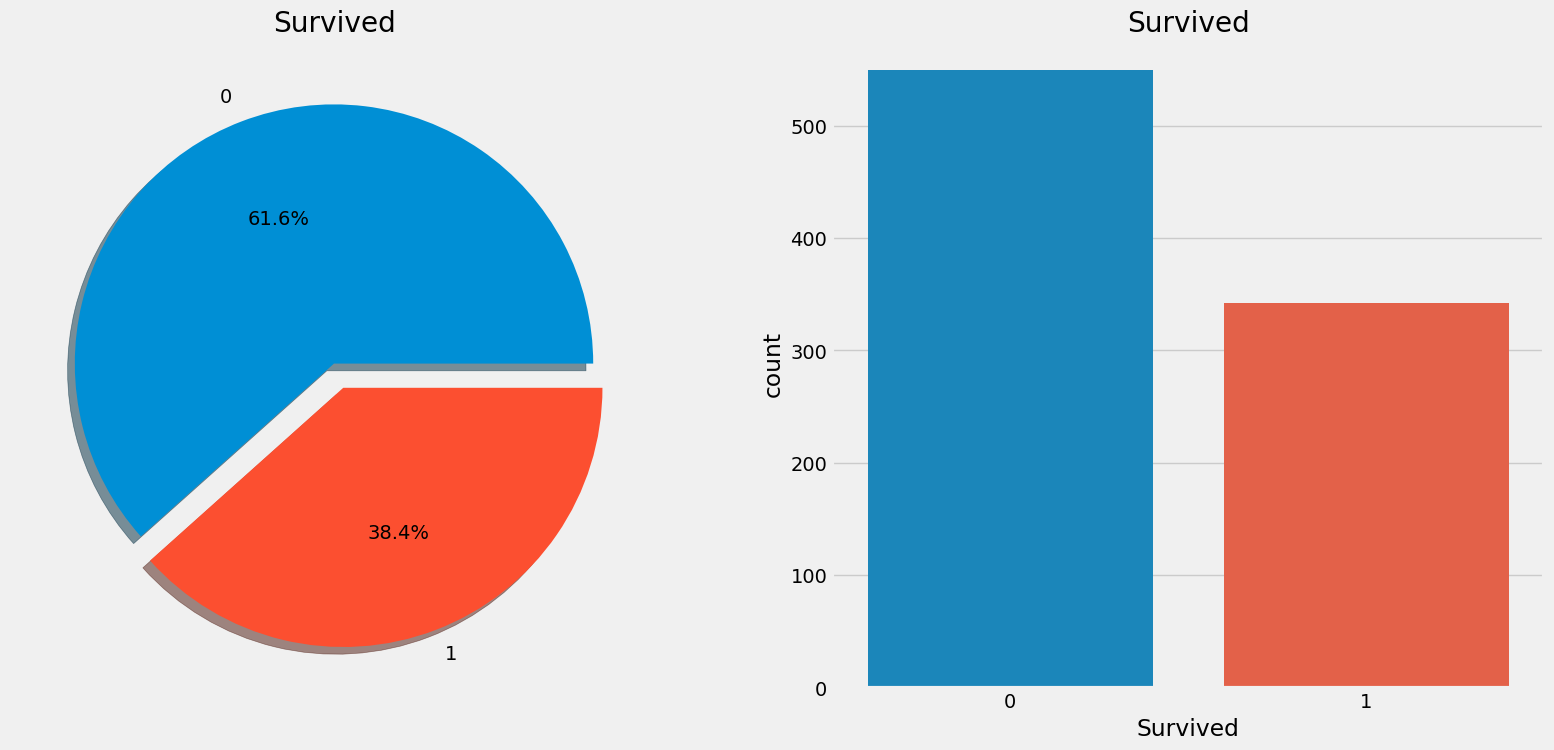

In [15]:
fig, ax=plt.subplots(1,2,figsize=(18,8))
tr['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=tr,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**0 = 사망, 1 = 생존**이므로 생존자 비율은 38.4%임을 알 수 있다.  
어떤 범주의 승객이 생존했는지 컬럼(특성)을 살펴보자.

---

<시행착오>  
f, ax = plt.subplots(1,2,figsize=(18,8))  
- 위의 코드에서 타이핑 실수로 오류가 발생했으나, 사용법을 알게 되었다.
    - subplot과 subplots는 모두 한 번에 여러 그래프를 보여주기 위해 사용되는 코드이지만 사용법이 다르다.
    - 각각 3개, 2개의 입력값을 받는다.

---

### 1-2. 여러 특성(피처)분석으로 관계 또는 추세 분석하기
**피처(자료) 타입**
- 범주형 피처
    - 머신러닝을 위해 인코딩하여 수치 데이터로 변환해야 한다.
    - 데이터셋 내 해당 컬럼 : Sex, Embarked

- 이산형 자료(수치형 피처)
    - 범주형 데이터와 유사하지만 값 간의 상대적 순서 또는 정렬이 가능하다는 차이점이 있다.
    - 데이터셋 내 해당 컬럼 : PClass

- 연속형 자료(수치형 피처)
    - 두 지점 사이 또는 최소값~최대값 사이의 값을 취할 수 있는 경우에 연속 피처라고 한다.
    - 데이터셋 내 해당 컬럼 : Age

**피처 분석**
- 성별(Sex) 분석

In [16]:
tr.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

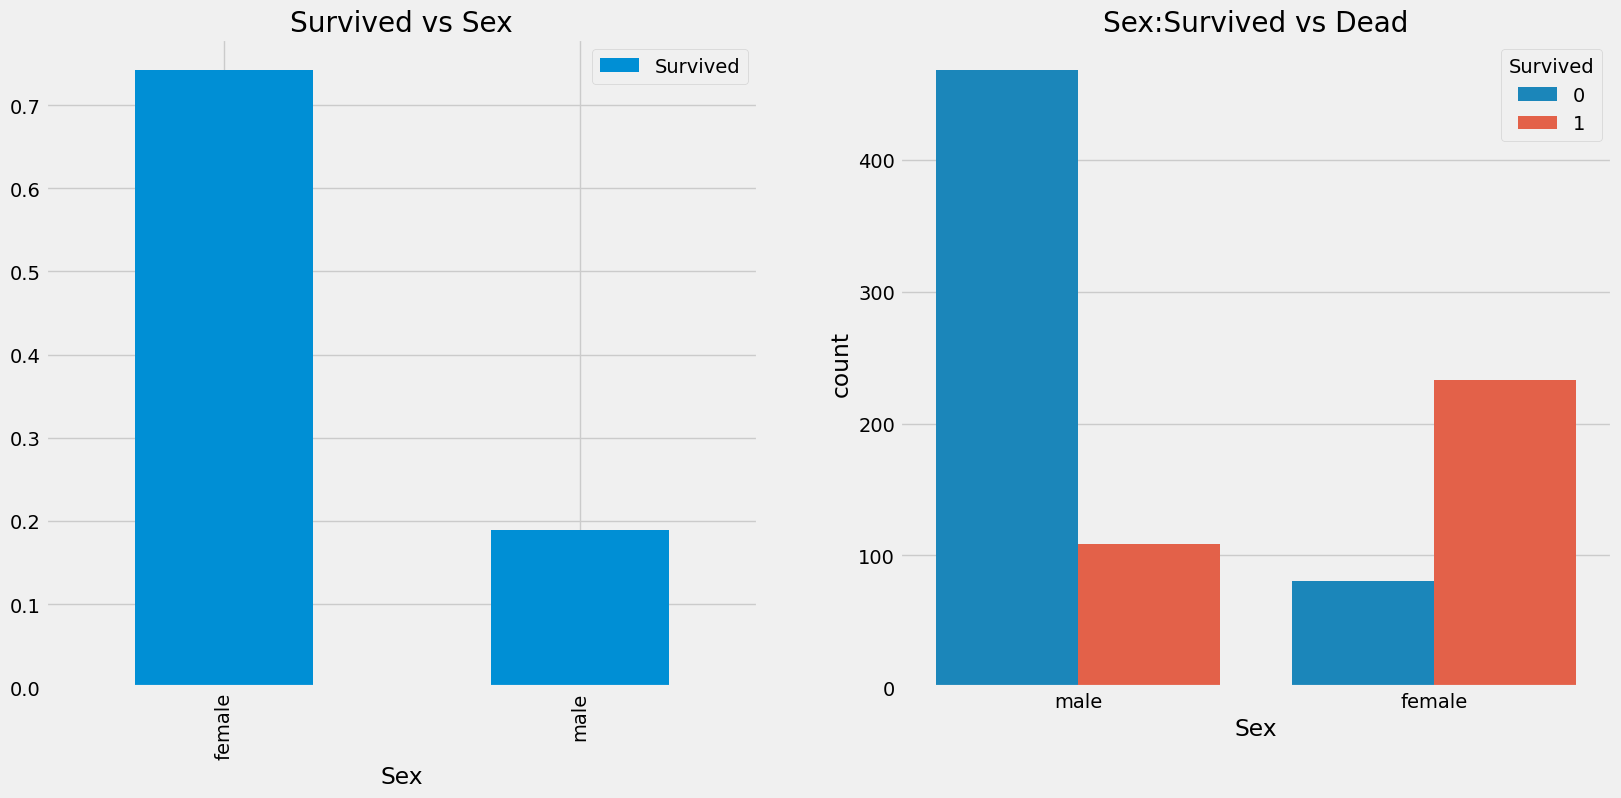

In [17]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
tr[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=tr, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

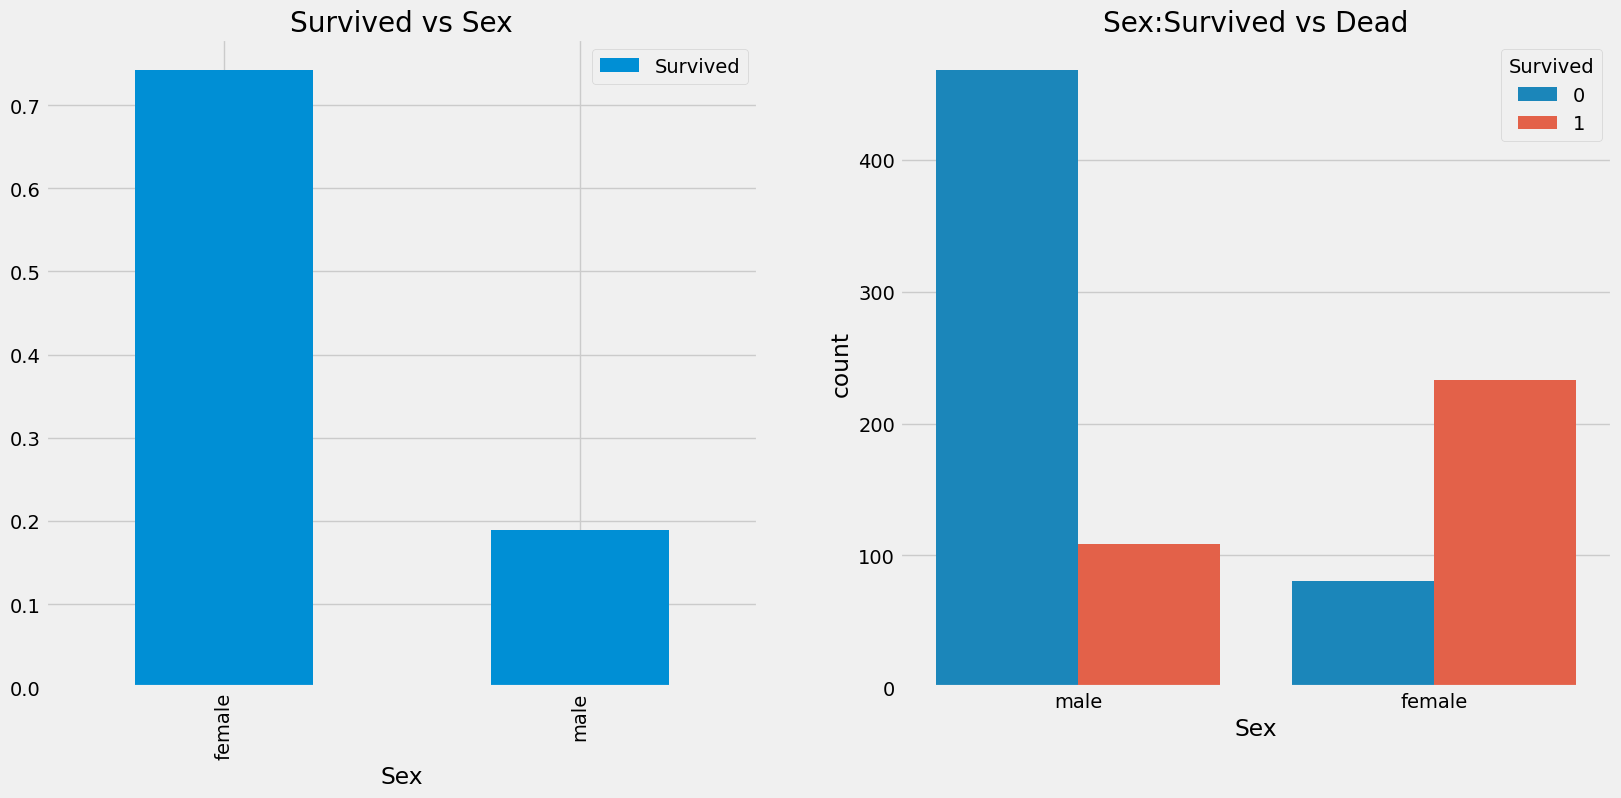

In [18]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
tr[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 오류 발생으로 자료 타입 str으로 강제 변환 (AttributeError: 'numpy.int64' object has no attribute 'startswith')
tr[['Sex', 'Survived']] = tr[['Sex', 'Survived']].astype(str)

sns.countplot(x='Sex', hue='Survived', data=tr, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

@ 해석  
- 탑승객의 수는 남성이 압도적으로 높았으나,
- 각 성별의 생존 비율은 여성이 약 74%, 남성은 약 19%로 여성의 생존 비율이 압도적으로 높았다.
- 생존자 수 기준으로는 여성이 남성 대비 약 2배이다.

-> 성별은 모델링에서 중요한 피처

- Pclass 피처 분석

In [19]:
pd.crosstab(tr.Pclass, tr.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


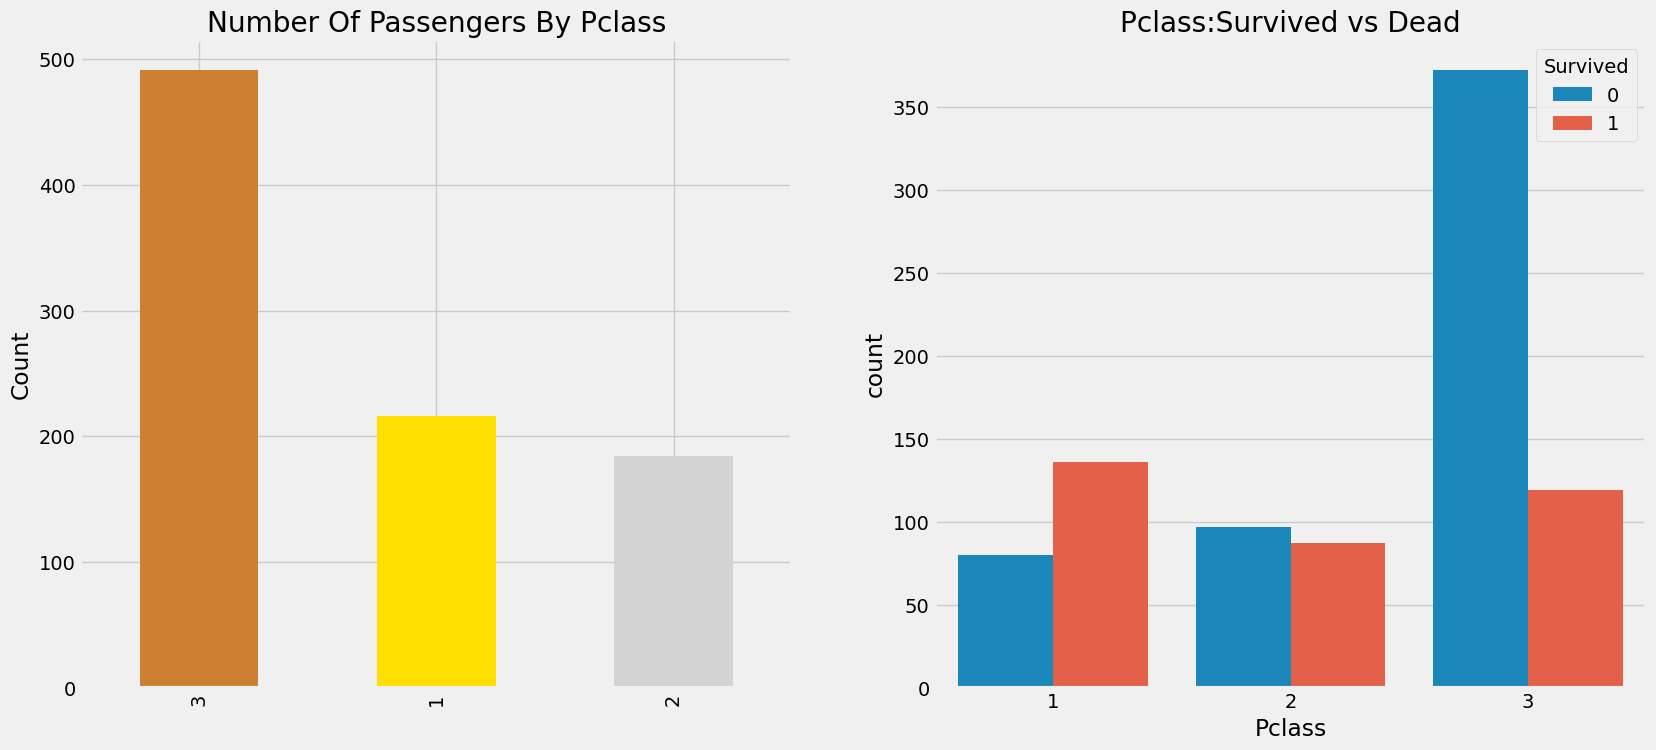

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
tr['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=tr,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

@ 해석  
- (좌측 그래프) 티켓 클래스 별 탑승객 수 : 3등급 승객 수가 압도적으로 높음
- (우측 그래프) 티켓 클래스 별 생존자 비율 : 1등급은 63%, 2등급은 48%, 3등급은 25%  
    - 탑승객 수는 3등급이 제일 높지만 생존자 비율은 1등급이 가장 높다.
    - 생존자 수 자체도 3등급보다 1등급이 더 많다.

-> 생존자 예측 모델에 성별과 티켓 클래스 피처가 유의미할 것으로 판단됨.

In [21]:
pd.crosstab([tr.Sex,tr.Survived],tr.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',data=tr)
plt.show()

AttributeError: ignored

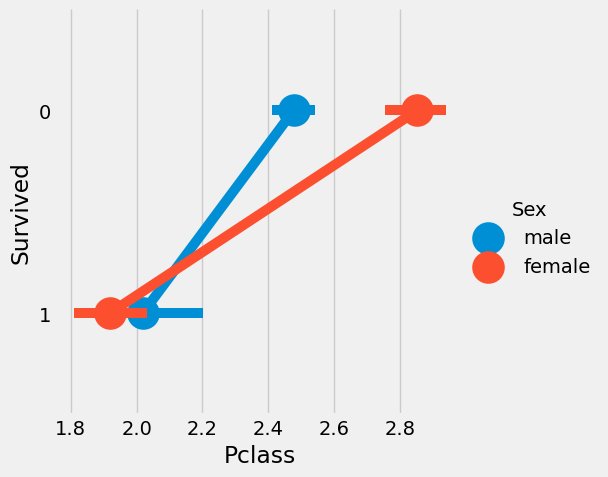

In [23]:
# 오류 발생
 # 'factorplot' -> 'catplot' 대체함. ('seaborn'에서 더 이상 'factorplot'를 지원하지 않음.)

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=tr, kind='point')

@ 해석  
- 여성 중 1등급 승객의 생존율이 약 95~96%
- 1등급 승객에서 여성 대비 남성의 생존율이 매우 낮은 것으로 보아 구조 시 'Pclass' 보다는 '성별'이 우선순위였음을 알 수 있다.

**연령(Age) 피처 분석**

In [24]:
print('Oldest Passenger was of:',tr['Age'].max(),'Years')
print('Youngest Passenger was of:',tr['Age'].min(),'Years')
print('Average Age on the ship:',tr['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


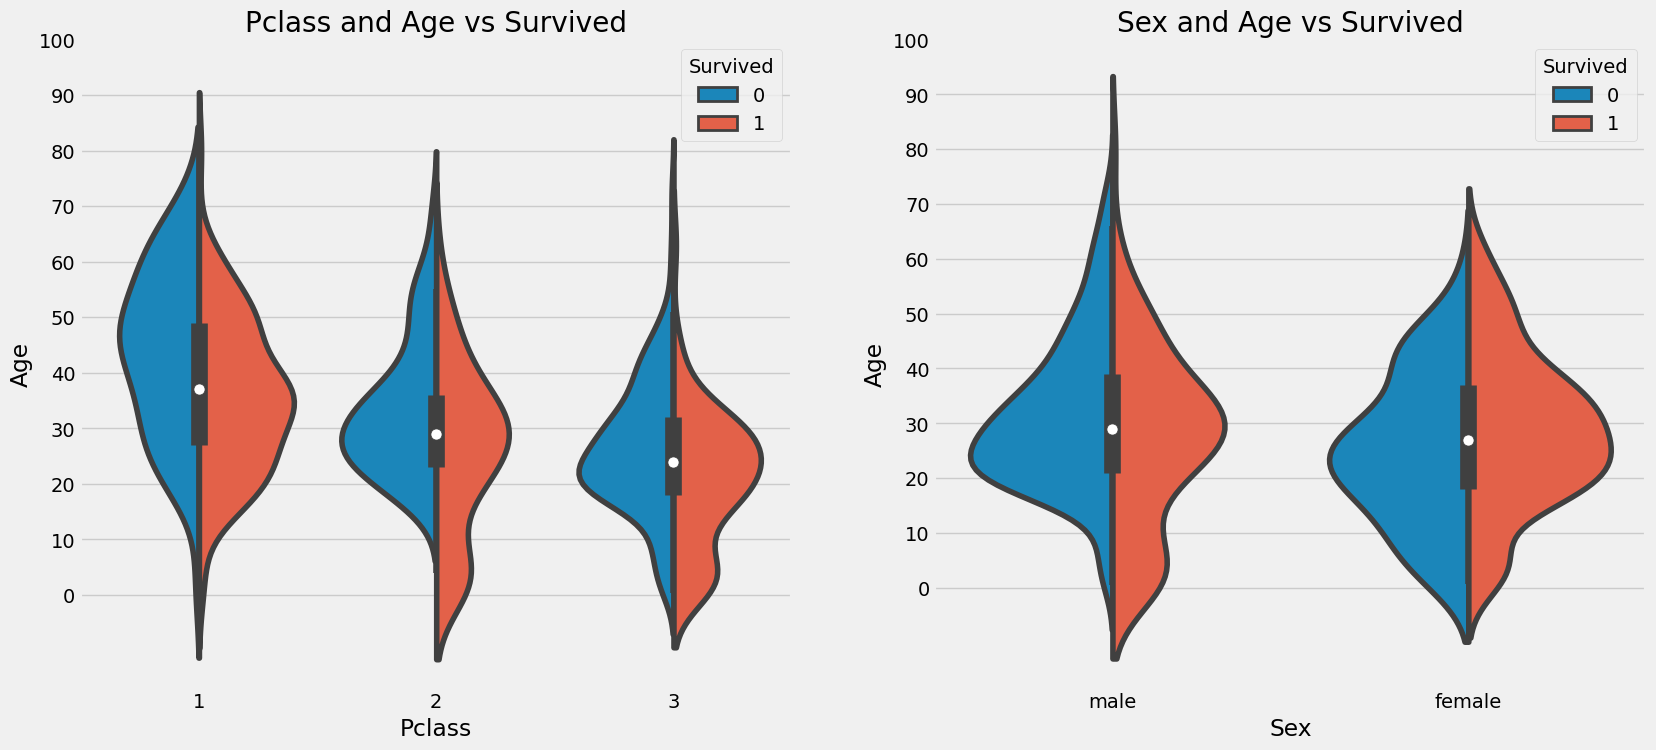

In [25]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=tr, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=tr, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

@ 해석
- Pclass에 따라 어린이 수가 증가하는데, 10세 미만 승객(즉, 어린이)의 생존율은 Pclass와 관계없이 양호
- Pclass1의 20-50세 승객의 생존 가능성은 높으며 여성의 경우 더욱 좋음
- 남자의 경우 나이가 들수록 생존율이 감소
- Age의 결측치는 어떤 것으로 채울 것인가?
    - 단순히 평균 연령을 넣기에는 다양한 연령을 아우르는 데이터셋이 되지 못함
    - 따라서 '이름' 에서 Mr와 Mrs의 평균 값을 각 그룹에 할당!!

**이름 피처 분석**

In [103]:
tr['Initial']=0   # Initial 피처를 데이터프레임에 추가
for i in tr:
    tr['Initial']=tr.Name.str.extract('([A-Za-z]+)\.')    # 정규표현식을 사용하여 각 이름에서 수식어(Mr., Mrs. 등) 추출

# '([A-Za-z]+)\.' 정규표현식 해석 : 대소문자 알파벳으로 시작하고, 마침표로 끝나는 패턴

In [104]:
pd.crosstab(tr.Initial,tr.Sex).T.style.background_gradient(cmap='summer_r') # 이니셜과 성별 함께 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [105]:
# 오타 수정 (Mlle, Mme 등 -> Miss)

tr['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True
)

In [106]:
# Initials 평균 나이 확인
tr.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**연령(Age) 결측치 채우기**

In [30]:
# Initial 종류 별 평균값으로 결측치 채우기
tr.loc[(tr.Age.isnull())&(tr.Initial=='Mr'),'Age']=33
tr.loc[(tr.Age.isnull())&(tr.Initial=='Mrs'),'Age']=36
tr.loc[(tr.Age.isnull())&(tr.Initial=='Master'),'Age']=5
tr.loc[(tr.Age.isnull())&(tr.Initial=='Miss'),'Age']=22
tr.loc[(tr.Age.isnull())&(tr.Initial=='Other'),'Age']=46

In [31]:
# Age 내 결측치 있는지 확인 -> 없음!
tr.Age.isnull().any()

False

In [32]:
tr.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Initial         object
dtype: object

In [33]:
tr[tr['Survived']==0].shape

(0, 13)

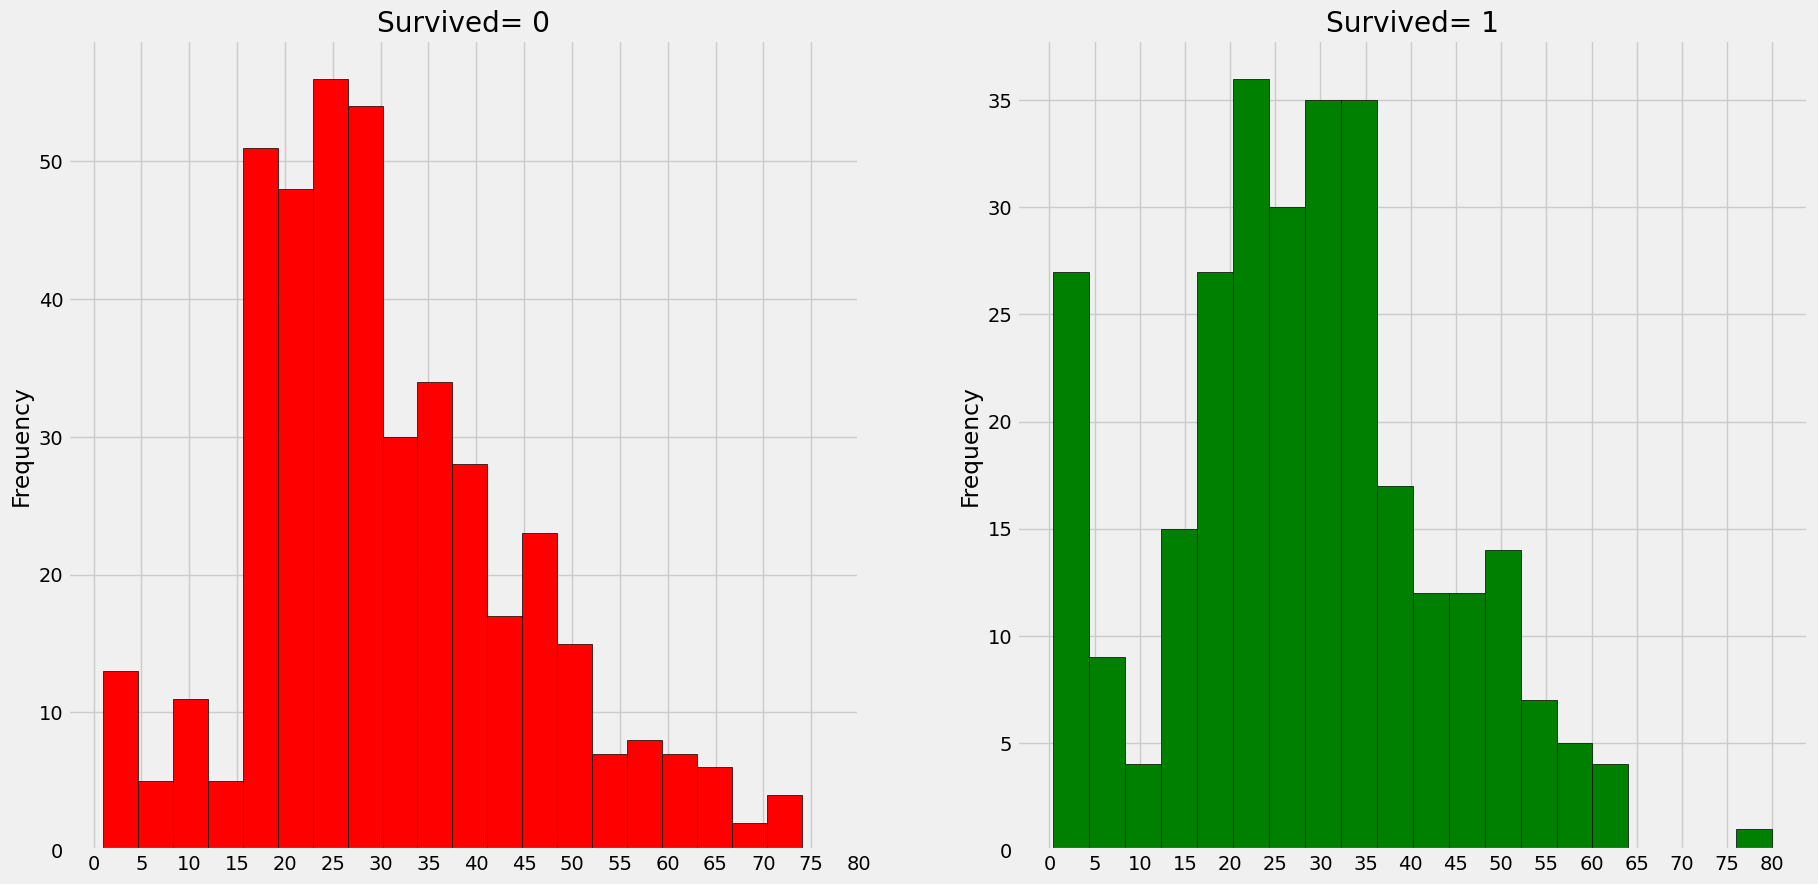

In [39]:
# 연령대 별 사망자/생존자 인원 시각화
f,ax=plt.subplots(1,2,figsize=(20,10))

tr[tr['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

tr[tr['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

@ 해석
- 많은 수의 5세 미만의 유아를 구출
- 최고령 승객 구출 (80세)
- 최대 사망자 수는 30~40세 연령층

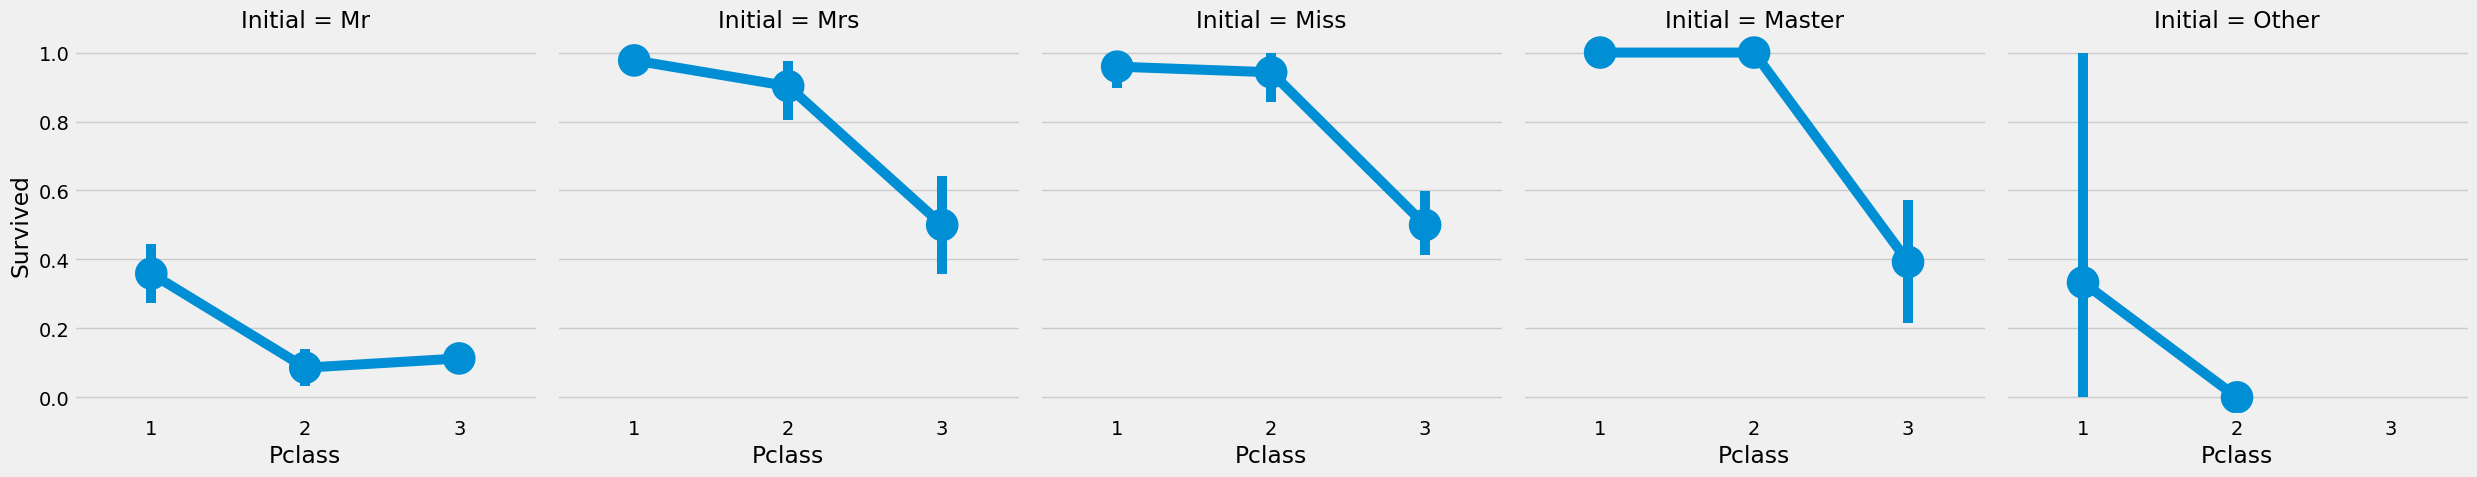

In [45]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=tr, kind='point')
plt.show()

@ 해석 : 티켓 클래스(등급)에 상관없이 구출에서의 우선순위는 여성과 아동.

**승선항 피처 분석**

In [36]:
pd.crosstab([tr.Embarked,tr.Pclass],[tr.Sex,tr.Survived],margins=True).style.background_gradient(cmap='summer_r')

**승선항 별 생존 가능성**

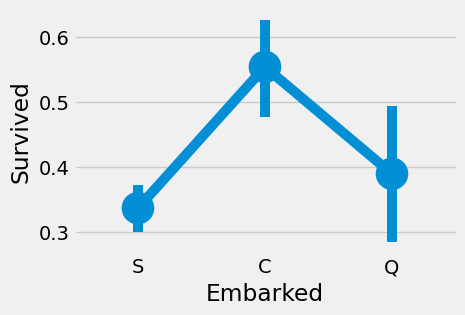

In [46]:
sns.catplot(x='Embarked', y='Survived', data=tr, kind='point')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

@ 해석 : 승선항 별 생존 가능성은 C가 약 0.55로 가장 높고, S가 가장 낮음

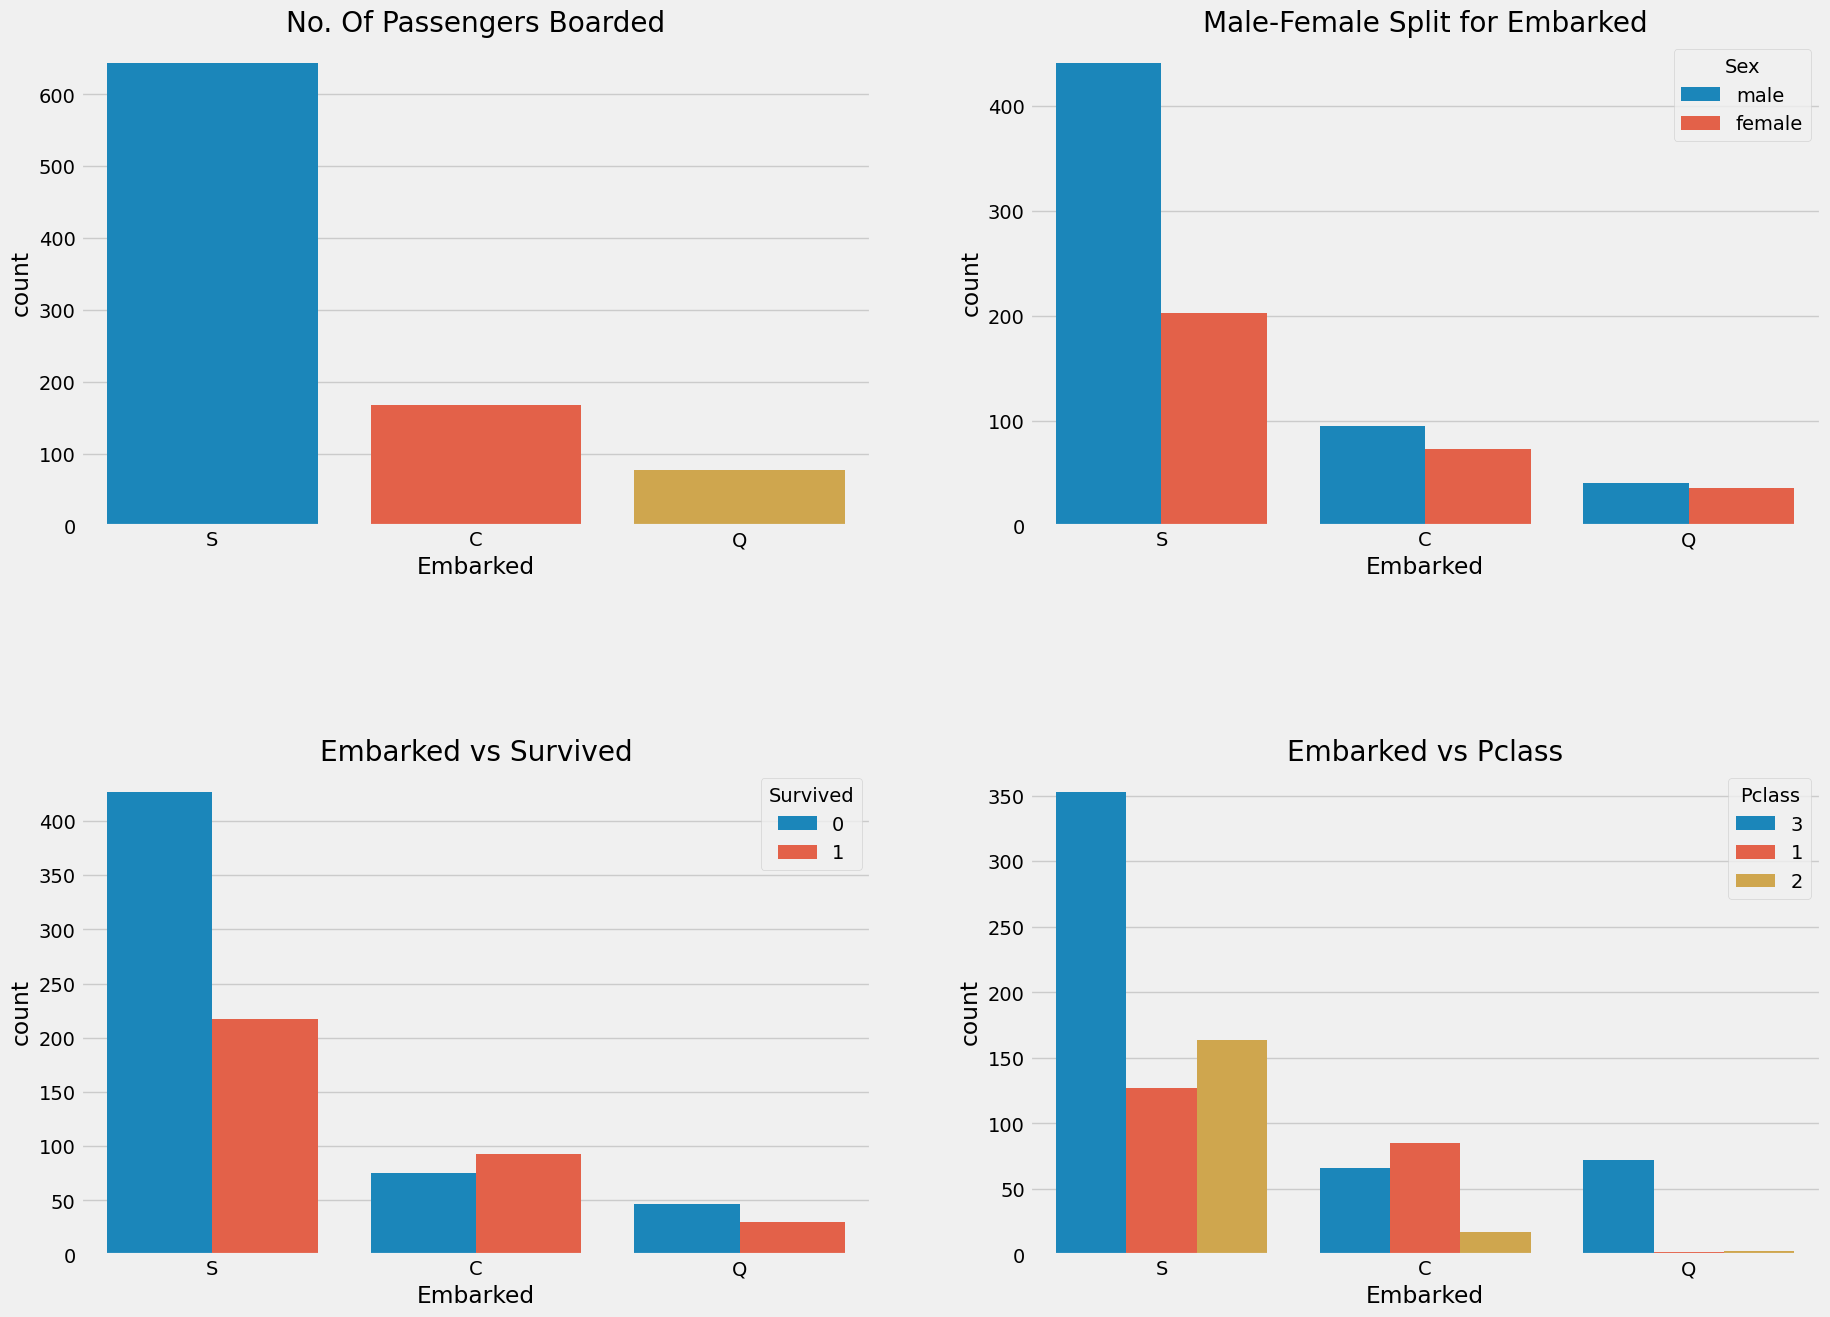

In [47]:
tr[['Sex', 'Survived', 'Pclass']] = tr[['Sex', 'Survived', 'Pclass']].astype(str)

fig, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=tr,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=tr,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=tr,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=tr,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

@ 해석
- S에서 탑승하는 최대 승객은 대부분 Pclass3
- C에서 온 승객들은 상당수가 살아남음. 인원 자체가 적어서 Pclass1과 Pclass2 승객 모두를 구조하였기 때문에 Lucky
- Embark S는 대부분의 부자들이 탑승했던 항구. 생존 가능성은 낮음. 이는 Pclass3의 승객 중 약 81%가 생존하지 못했기 때문.
- Q항의 승객 중 거의 95%가 Pclass3 출신

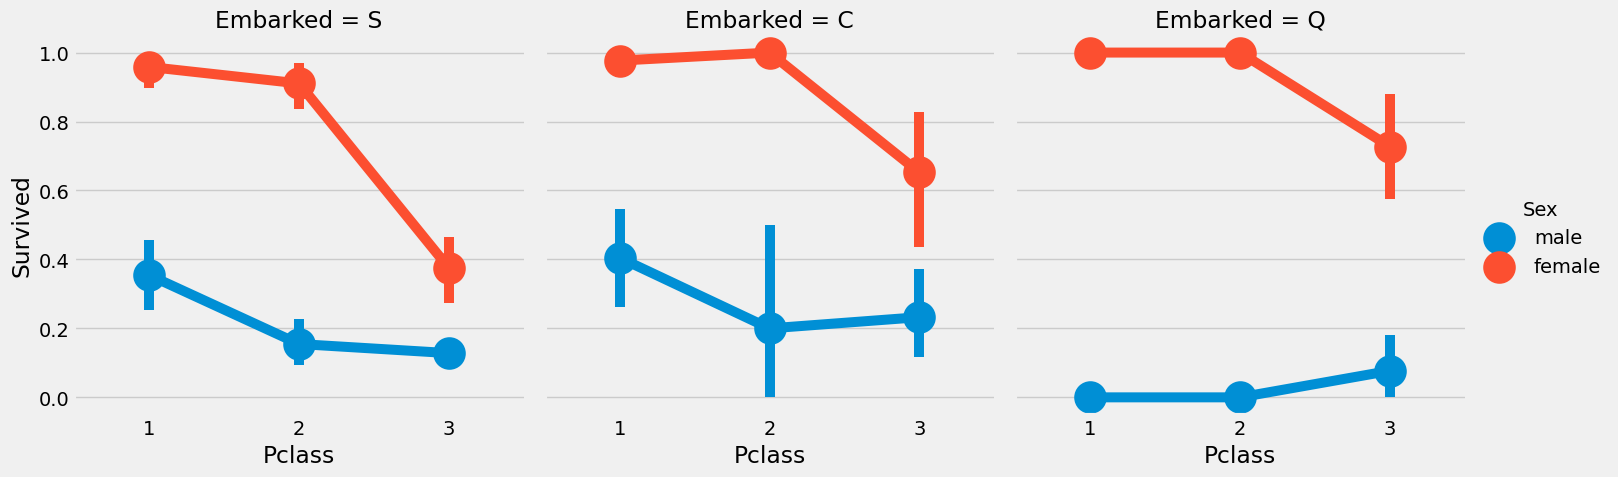

In [48]:
tr[['Pclass', 'Survived']] = tr[['Pclass', 'Survived']].astype(int)

sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=tr, kind='point')
plt.show()

@ 해석
- Pclass1과 Pclass2의 경우 Pclass와 상관없이 여성의 생존확률은 거의 1
- Port S의 Pclass3 승객은 남성과 여성 모두 생존율이 매우 낮기 때문에 Pclass3 승객에게는 매우 안타까운 상황
- 포트 Q는 거의 모두 Pclass 3 출신이기 때문에 남성의 생존 수치가 매우 좋지 않음

**승선항 결측치 채우기**  
Port S의 탑승객 수가 압도적으로 높으므로, 승선항 결측치는 S로 채우기

In [49]:
tr['Embarked'].fillna('S',inplace=True)
tr.Embarked.isnull().any()

False

**SibSp(이산형 피처) 분석**
- 개인이 혼자 있는지 아니면 가족과 함께 있는지를 나타내는 피처
    - 형제자매 = 형제, 자매, 이복형제, 이복자매
    - 배우자 = 남편, 아내

In [50]:
pd.crosstab([tr.SibSp],tr.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


AttributeError: ignored

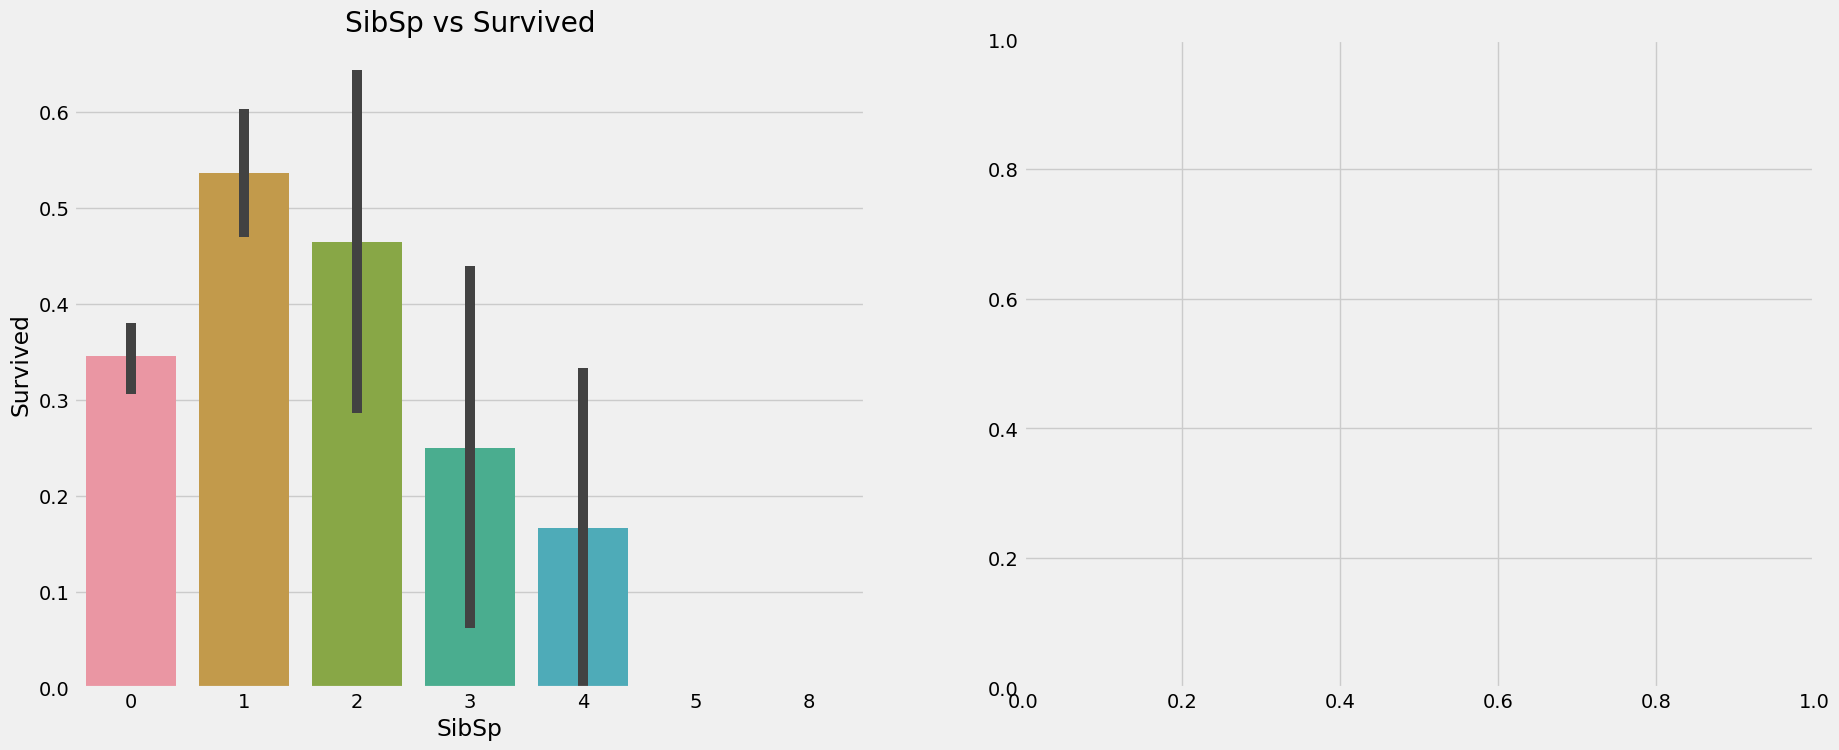

In [51]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived',data=tr,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot(x='SibSp', y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

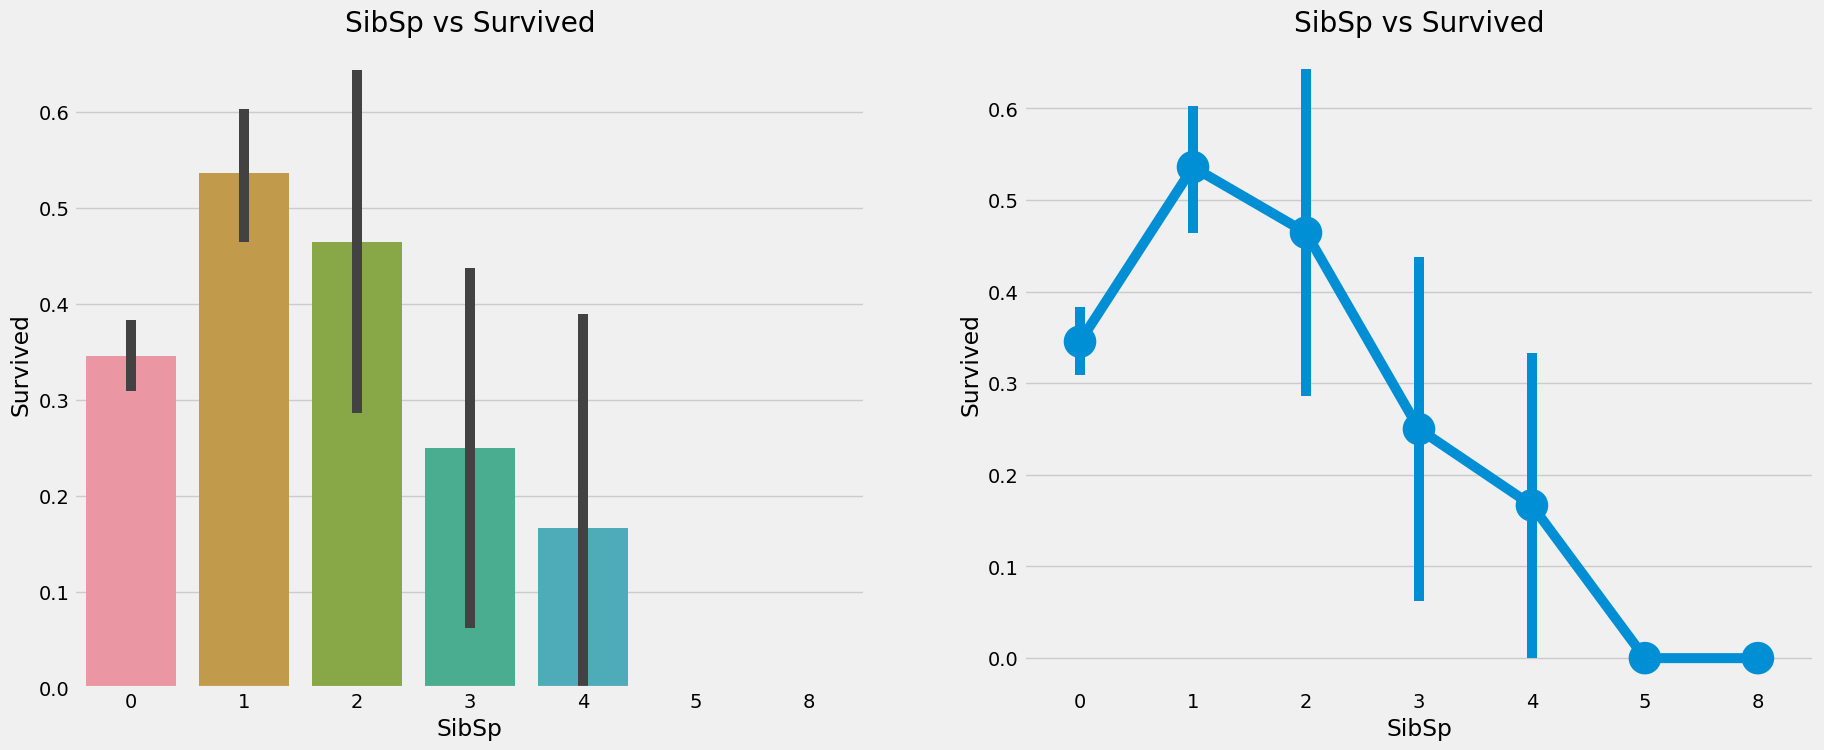

In [52]:
# 오류 수정 : factorplot을 pointplot으로 대체 ___sns.pointplot(x='SibSp', y='Survived',data=tr, ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived',data=tr,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived',data=tr, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

@ 해석
- 막대 그래프와 요인 그림은 승객이 형제자매 없이 혼자 탑승한 경우 생존율이 34.5%임을 보여줌
- 형제 수가 증가하면 그래프가 대략적으로 감소
- 5~8인 가족의 생존율은 0% -> 이것의 원인은?

In [53]:
pd.crosstab(tr.SibSp,tr.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


@ 해석
- 5~8인 가족의 생존율은 0%인 이유
    - SibSp>3인 사람이 모두 Pclass3에 있음

**Parch 분석**
- 부모와 자녀
- 수치는 부모의 숫자(친부모, 보모 등)

In [54]:
pd.crosstab(tr.Parch,tr.Pclass).style.background_gradient(cmap='summer_r')

# 가족 인원이 많을수록 Pclass3에 탑승한 것을 볼 수 있다.

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


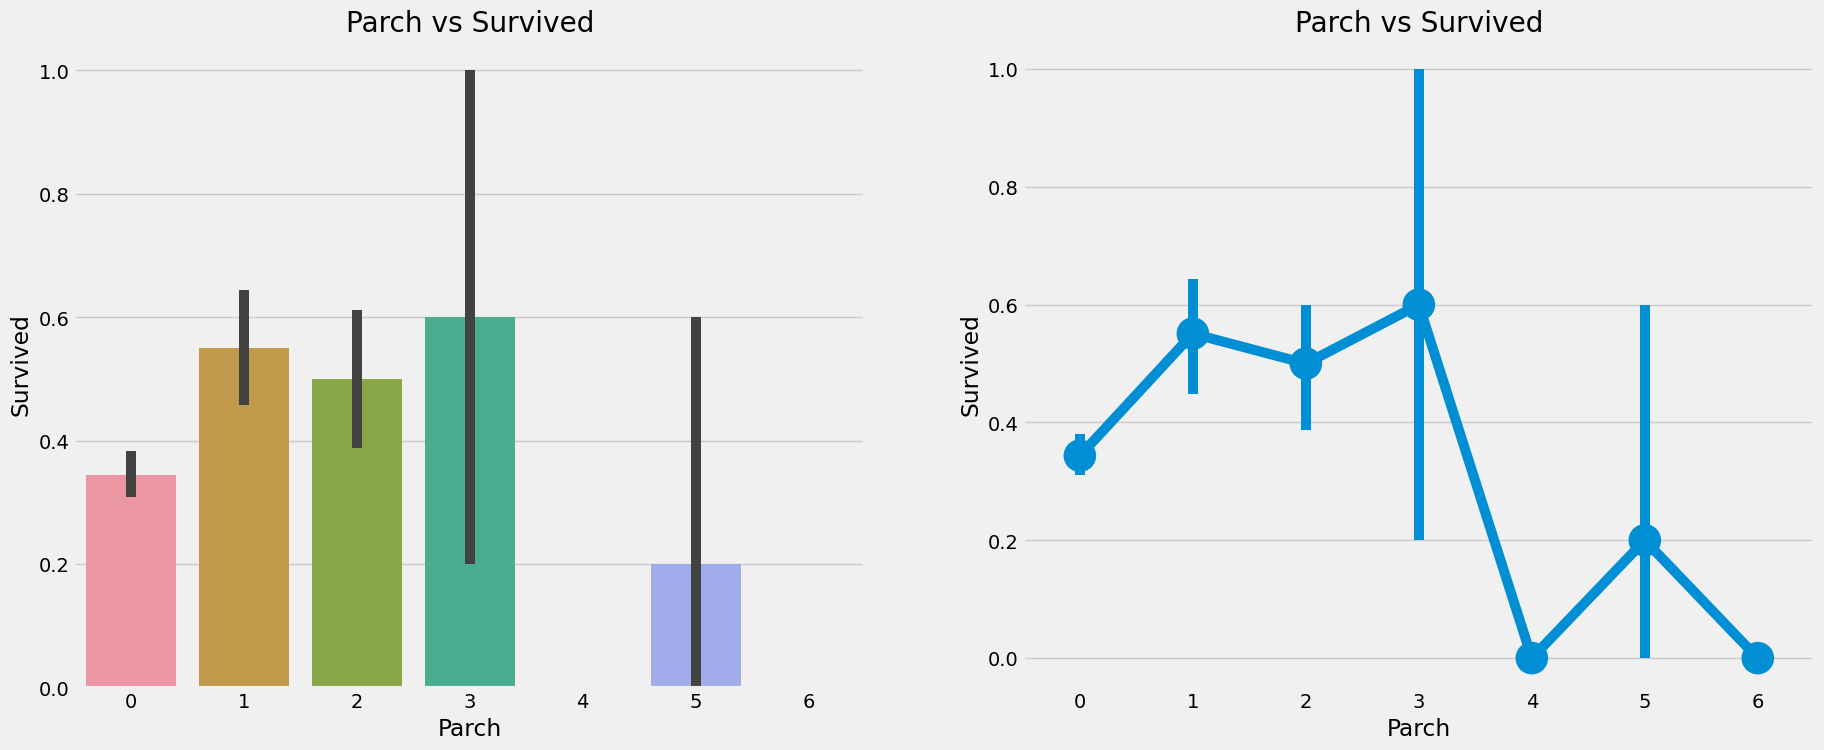

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=tr,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=tr,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

@ 해석
- 부모와 함께 탑승한 승객은 생존 가능성이 더 높지만, 숫자가 올라갈수록 감소
    - 배에 1~3명의 부모가 있는 사람에게는 생존 가능성이 높음
    - 혼자 있는 것도 치명적이며, 배에 부모가 4명 이상 있으면 생존 가능성이 감소

**Fare(연속형 자료) 피처 분석**

In [56]:
print('Highest Fare was:',tr['Fare'].max())
print('Lowest Fare was:',tr['Fare'].min())
print('Average Fare was:',tr['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


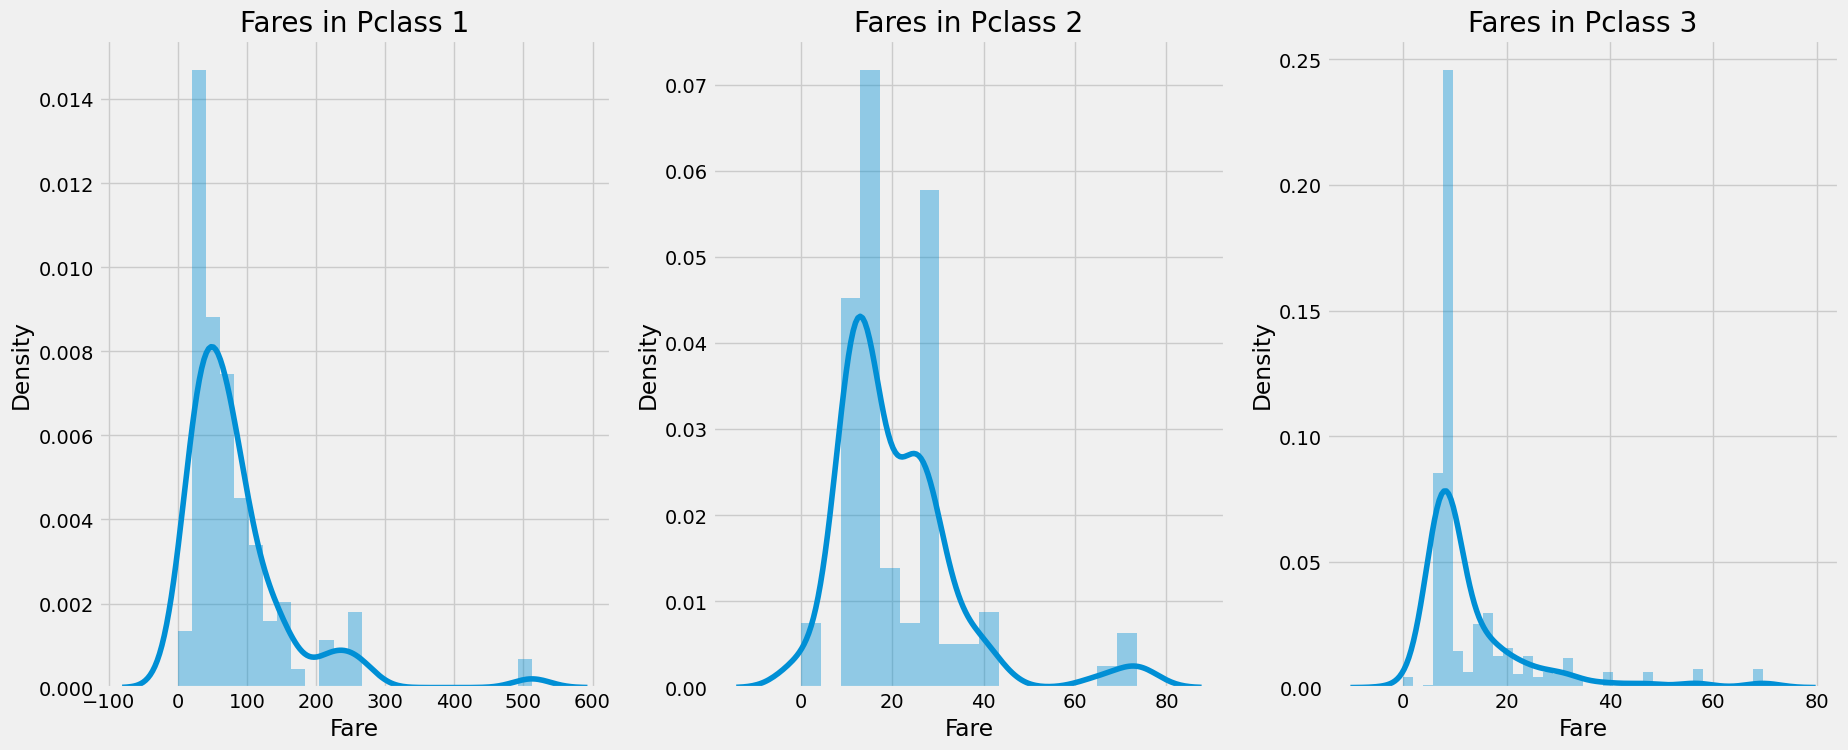

In [57]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(tr[tr['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(tr[tr['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(tr[tr['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 운임에 큰 분포가 있는 것으로 보이며 이러한 분포는 표준이 감소함에 따라 계속 감소한다. (이것도 연속적이므로 binnig을 사용하여 이산형 값으로 변환할 수 있다.)

## 모든 피처에 대한 간략한 분석
- 성별: 여성의 생존 확률은 남성에 비해 높다.

- Pclass
    - 1등석 승객이 되면 생존 가능성이 더 높아진다는 추세가 눈에 띄게 나타난다.  
    - Pclass3의 생존율은 매우 낮다.   
    - 여성의 경우 Pclass1의 생존 확률은 거의 1이고 Pclass2의 생존 확률도 높다.
    - 부유할수록 생존 확률이 높다.

- 연령: 5~10세 미만의 어린이는 생존 가능성이 높다. 15세에서 35세 사이의 승객이 많이 사망했다.

- Embarked: C에서의 생존 가능성은 Pclass1 승객의 대다수가 S에서 일어났음에도 불구하고 더 나은 것으로 보인다. Q의 승객은 모두 Pclass3 출신이었다.

- Parch+SibSp: 1-2명의 형제자매, 배우자 또는 부모 1-3명이 혼자 여행하거나 대가족이 함께 여행하는 것보다 확률이 더 높다.

## 상관분석 : 피처 간의 상관관계

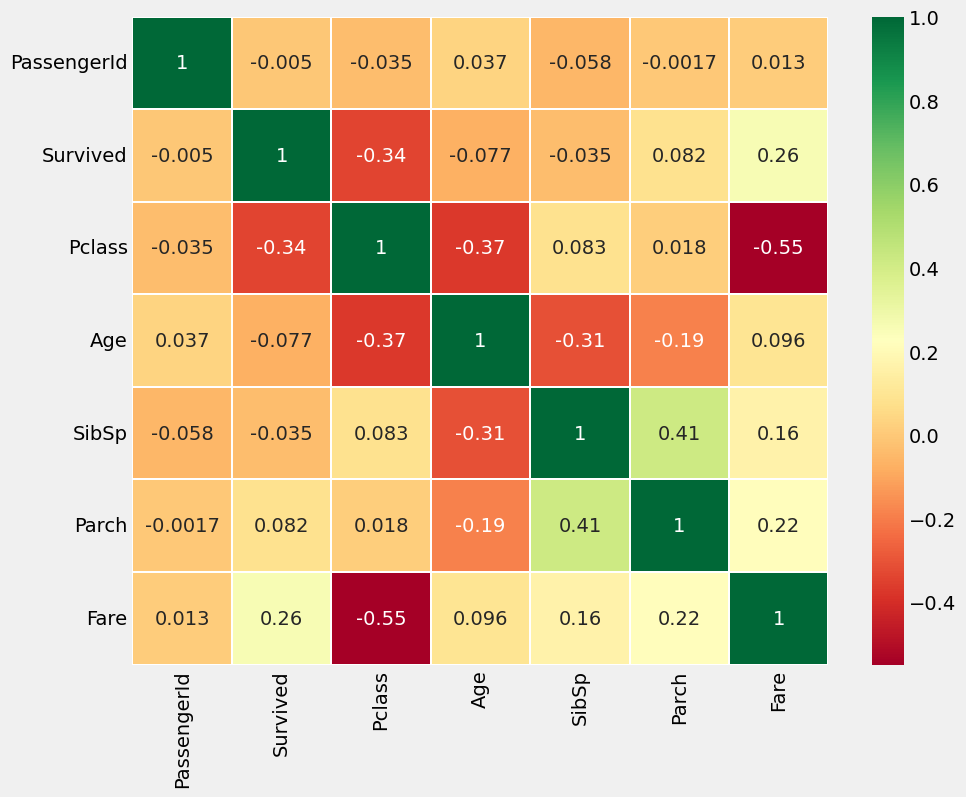

In [58]:
sns.heatmap(tr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)    # tr.corr() --> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

@ 히트맵 해석  
1. 히트맵에서는 숫자 특징만 비교한다.  
2. 상관관계 값
- **양의 상관관계** (값 1은 완벽한 양의 상관관계를 의미)
- **음의 상관관계** (값 -1은 완벽한 음의 상관관계를 의미
3. 다중공선성
- 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음.
- 다중공선성이 있을 경우 중복되는 기능 제거해야 함(훈련 시간과 많은 이점이 줄어들지 않도록)  

위의 히트맵의 경우 피처 간 상관관계가 별로 없으므로(가장 높은 것이 0.41) 다중공선성을 고려하지 않아도 된다.

## Part2: 특성 추출 및 데이터 정리
모든 특성이 중요할 필요는 없다.   
제거해야 할 중복 기능이 많이 있을 수 있다.   
또한 다른 특성에서 정보를 관찰하거나 추출하여 새로운 특성을 얻거나 추가(ex. Initals)할 수도 있다.

- 몇 가지 기능을 추가합니다.
- 중복되는 기능을 제거합니다.
- 모델링에 적합한 형태로 기능을 변환합니다.  

### Age_band
- Age 피처의 문제점
    - 나이는 연속적인 숫자이므로 머신러닝 그룹화가 잘 이루어지지 않을 수 있다.  
    (30명의 사람이 있는 경우 Age값이 30개일 수 있는 경우)
    - 따라서 연속값을 구간화 또는 정규화를 통해 범주형 값으로 변환해야 한다.
    - 여기서는 구간화를 사용 : 0~80(최대 연령)세를 5구간으로 나누기. 크기는 16(=80/5)이다.

In [68]:
tr['Age_band']=0
tr.loc[tr['Age']<=16,'Age_band']=0
tr.loc[(tr['Age']>16)&(tr['Age']<=32),'Age_band']=1
tr.loc[(tr['Age']>32)&(tr['Age']<=48),'Age_band']=2
tr.loc[(tr['Age']>48)&(tr['Age']<=64),'Age_band']=3
tr.loc[tr['Age']>64,'Age_band']=4
tr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [69]:
tr['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  # 각 구간의 승객수 확인

,Age_band
1,346
0,277
2,188
3,69
4,11


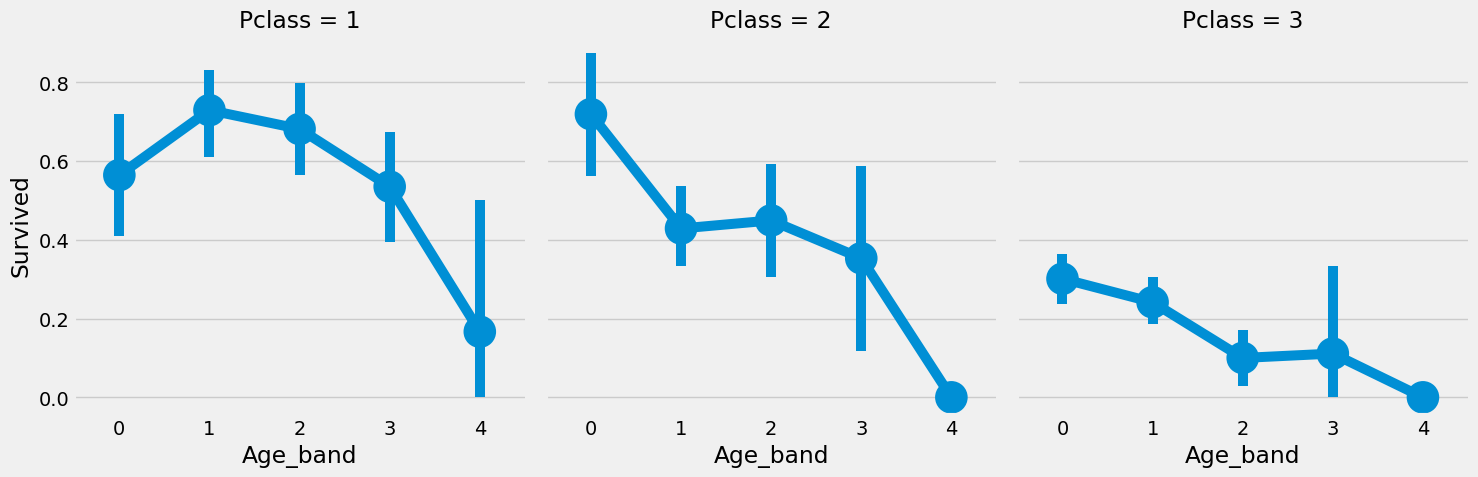

In [73]:
sns.catplot(x='Age_band',y='Survived',data=tr,col='Pclass', kind='point')
plt.show()

@ 해석 : Pclass와 상관없이 나이가 들수록 생존율은 감소

### 가족 : 규모와 혼자인 경우에 따라
- Family_size와 Alone이라는 새로운 피처를 생성하고 분석하기
- 이 피처는 Parch와 SibSp를 합친 것
- 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공
- 혼자(Alone)는 승객이 혼자인지 아닌지를 나타냄


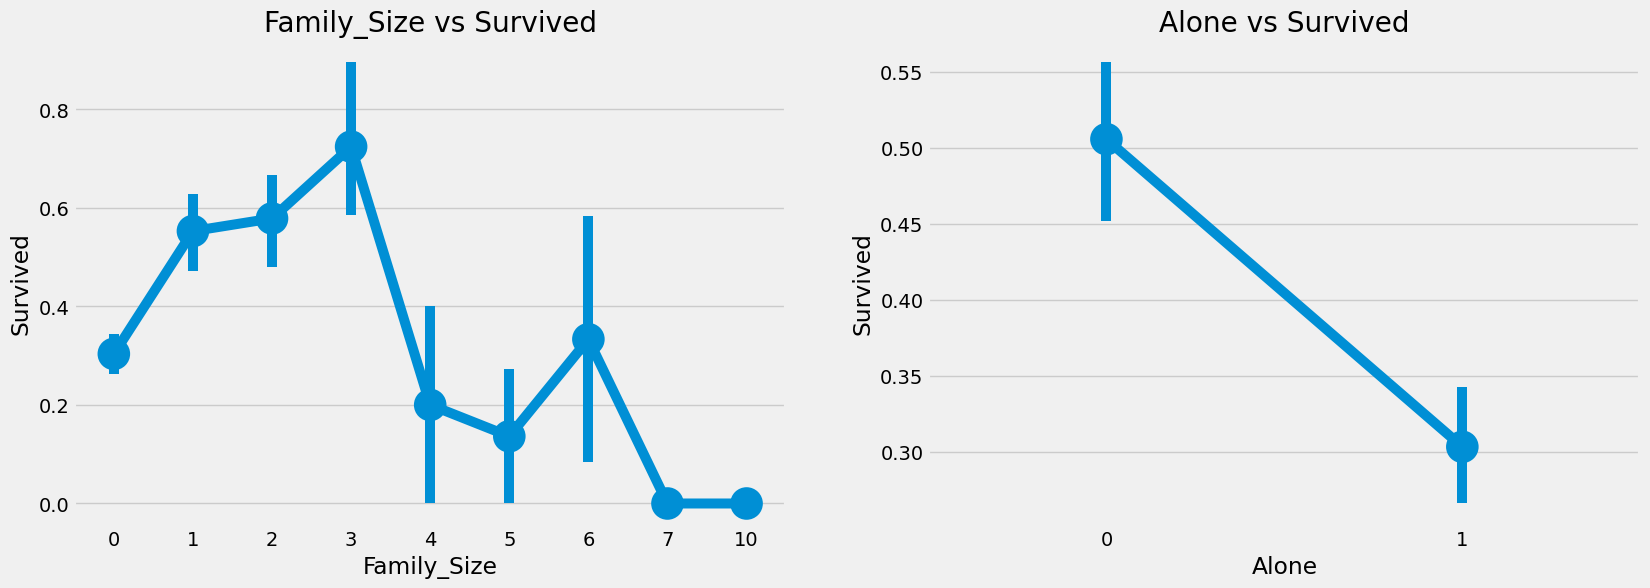

In [90]:
tr['Family_Size'] = 0
tr['Family_Size'] = tr['Parch'] + tr['SibSp']   # family size
tr['Alone'] = 0
tr.loc[tr.Family_Size==0, 'Alone']=1   # alone

fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=tr, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=tr, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

# factorplot을 pointplot로 변경하여 실행함

- Family_Size=0은 승객이 혼자라는 의미
    - 혼자이거나 family_size=0인 경우 생존 가능성은 매우 낮음
- 가족 규모가 4보다 크면 생존 가능성이 감소

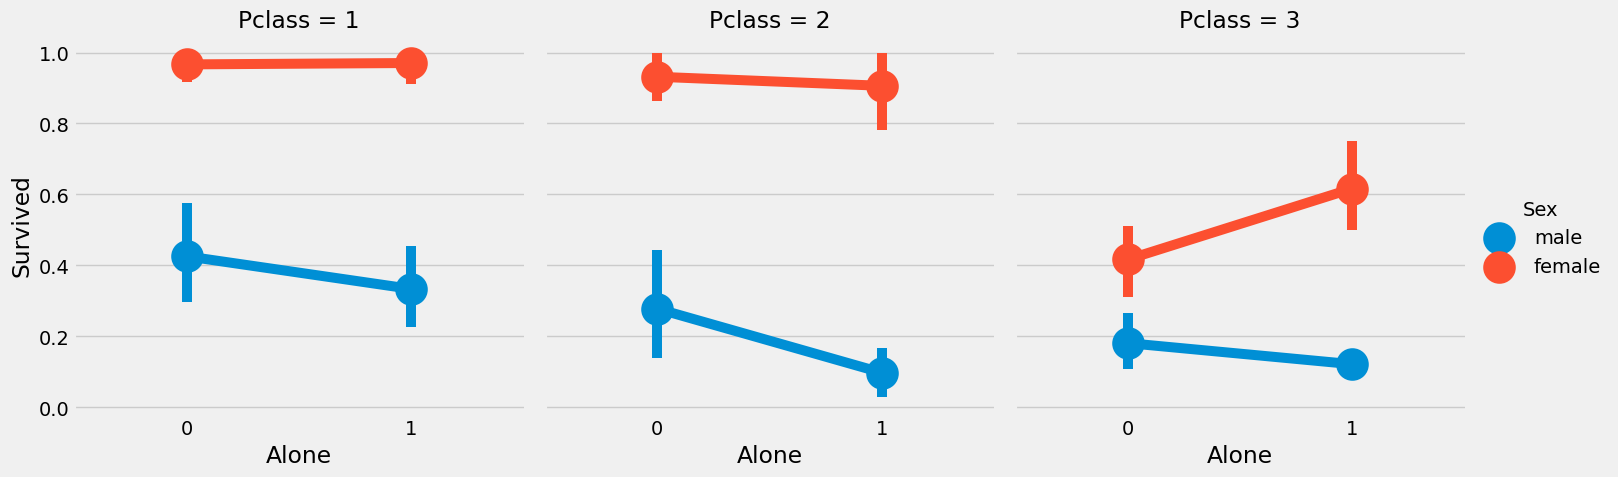

In [95]:
sns.catplot(x='Alone', y='Survived', data=tr, hue='Sex', col='Pclass', kind='point')
plt.show()

@ 해석  
Pclass3(가족이 있는 여성보다 혼자 있는 여성의 생존 확률이 높음)를 제외하고는 성별이나 Pclass에 관계없이 혼자 있는 것이 생존 확률이 낮다.

### Fare(요금) 범위
운임도 연속적인 특성이므로 서수 값으로 변환해야 한다. (pandas.qcut을 사용)  
- qcut : 우리가 통과한 bin의 수에 따라 값을 분할하거나 정렬하는 역할   
따라서 4개의 bin을 전달하면 값이 4개의 별도 bin 또는 값 범위에 동일한 간격으로 배열됩니다.

In [96]:
tr['Fare_Range'] = pd.qcut(tr['Fare'], 4)
tr.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


@ 해석  
- Fare_Range가 증가할수록 생존 가능성이 증가
- Fare_Range값은 처리가 되지 않으므로 싱글톤 값으로 변환해야 한다. (Age_Band처럼)

In [97]:
tr['Fare_cat']=0
tr.loc[tr['Fare']<=7.91,'Fare_cat']=0
tr.loc[(tr['Fare']>7.91)&(tr['Fare']<=14.454),'Fare_cat']=1
tr.loc[(tr['Fare']>14.454)&(tr['Fare']<=31),'Fare_cat']=2
tr.loc[(tr['Fare']>31)&(tr['Fare']<=513),'Fare_cat']=3

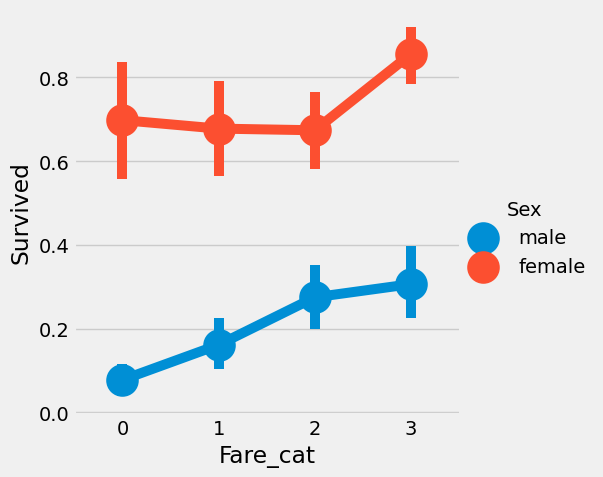

In [99]:
sns.catplot(x='Fare_cat',y='Survived',data=tr,hue='Sex', kind='point')
plt.show()

@ 해석  
- Fare_cat이 증가할수록 생존 가능성도 상승.
- 이 피처는 Sex와 함께 모델링하는 동안 중요한 기능이 될 수 있다.

### 문자열 값을 숫자로 변환
문자열을 기계 학습 모델에 전달할 수 없으므로 Sex, Embarked 등과 같은 기능을 숫자 값으로 변환해야 한다.

In [107]:
tr['Sex'].replace(['male','female'],[0,1],inplace=True)
tr['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
tr['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**불필요한 기능 삭제**  
- 이름 --> 이름 기능은 범주형 값으로 변환할 수 없으므로 필요 없음
- Age --> Age_band 기능이 있으므로 필요 없음
- 티켓 --> 분류할 수 없는 임의의 문자열
- Fare --> Fare_cat 기능이 있으므로 필요 없음
- 객실 --> 많은 NaN 값과 많은 승객이 여러 개의 객실을 가지고 있으므로 필요 없음
- Fare_Range --> Fare_cat 기능이 있음
- PassengerId--> 분류할 수 없음

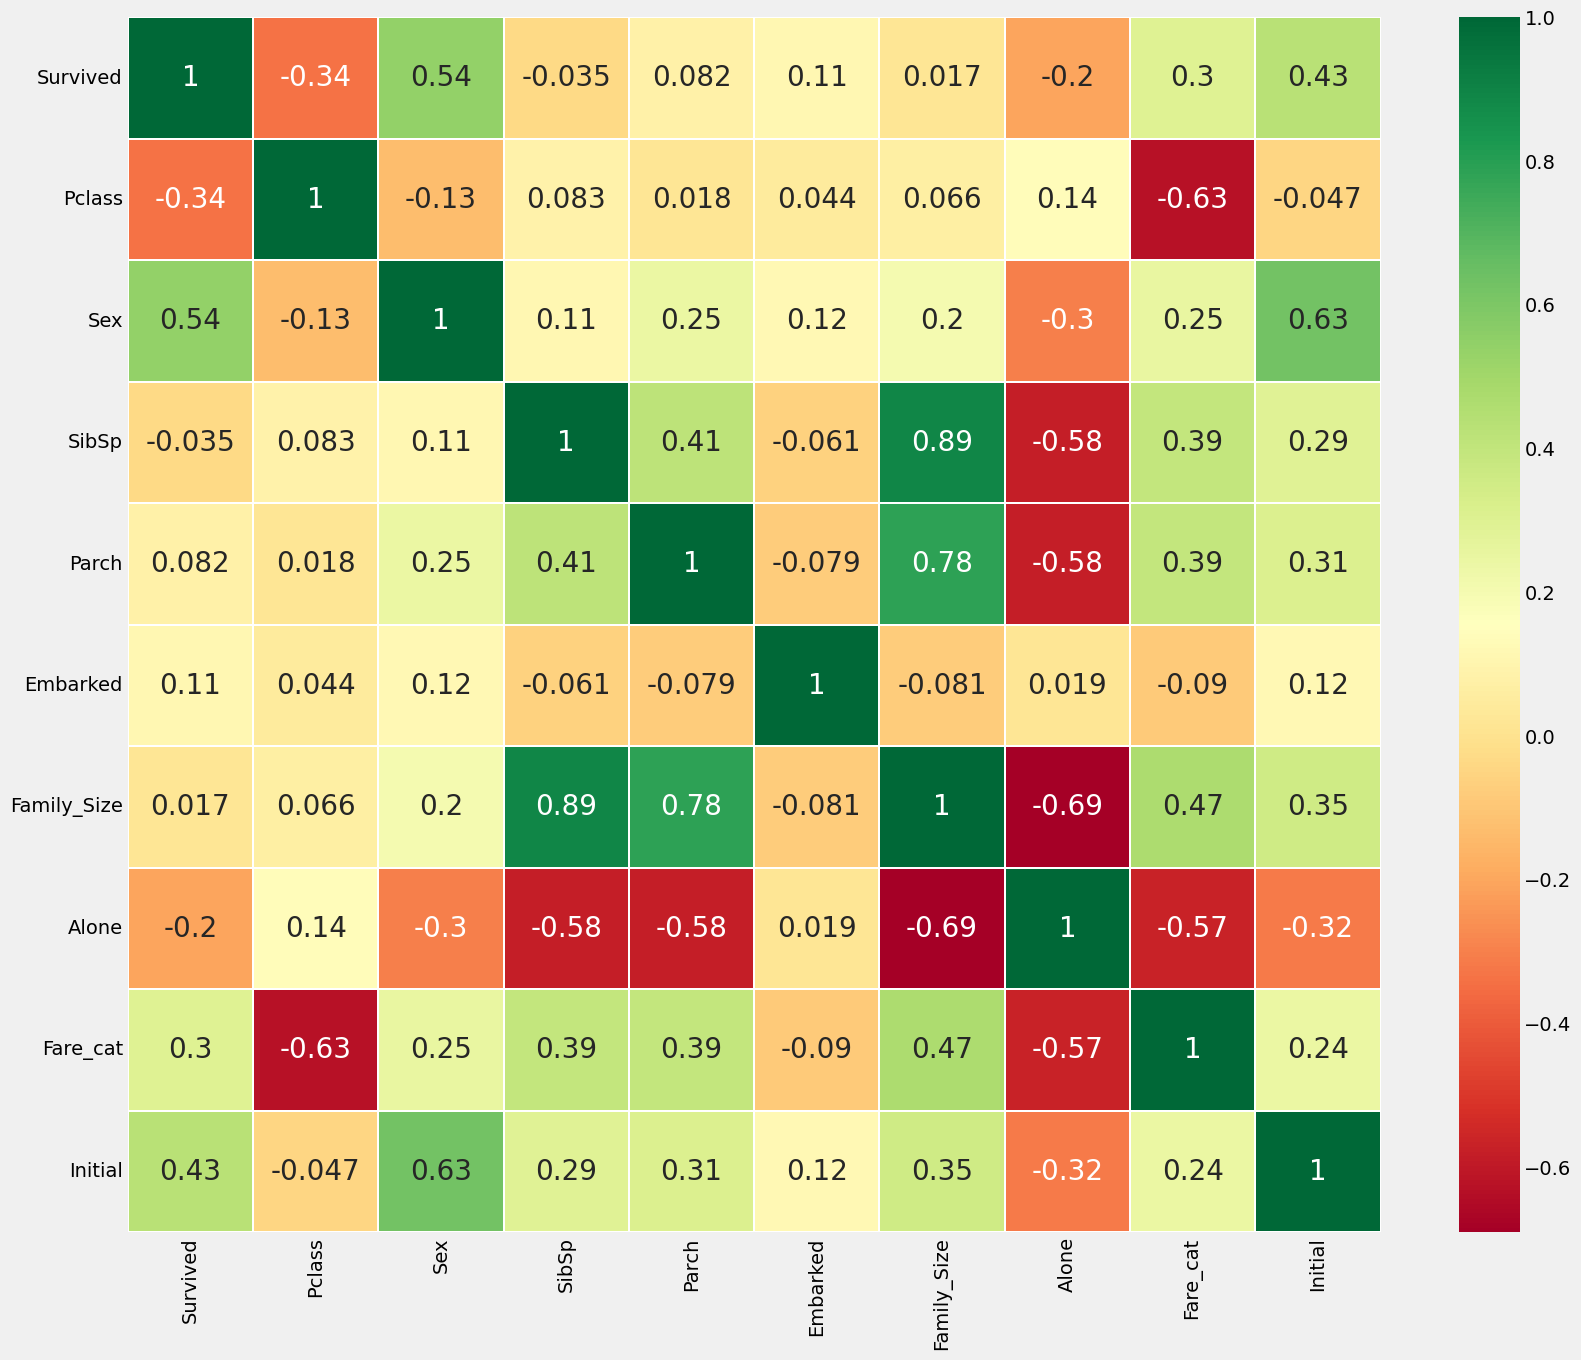

In [109]:
tr.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(tr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

@ 해석  
- 양의 상관관계 : SibSp와 Family_Size, Parch와 Family_Size
- 음의 상관관계 : Alone과 Family_Size

---

# 회고
## KEEP
- 코드를 손에 익히기 위해 직접 타이핑하며 연습했다.
- 지원하지 않는 plot을 대체하는 plot을 찾아서 적용, 코드를 정상적으로 실행하였다.
    
## PROBLEM
- 직접 타이핑하다보니 스펠링 오타가 간혹 생겼다.
- seabon이 더 이상 지원하지 않는 factorplot을 사용하여 오류 발생
- 주피터 노트북에서는 heatmap이 정상적으로 출력되지 않음.   
에러메세지를 해결하고자 여러 시도를 해보았지만 해결되지 않음.
(수치형 데이터로만 행렬 계산이 가능한 코드 추가 및 수정 등)

## TRY
- 코드 타이핑은 계속 연습하다보면 함수, plot명이 익숙해지면서 개선될 것!
- factorplot을 대체하는 catplot과 pointplot의 활용법 더 알아보기  
 자료형에 따른 활용 등
    - 범주형 자료
    - 이산형 자료(수치형 피처), 연속형 자료(수치형 피처)
- 동일한 heatmap 코드가 코랩에서는 정상 작동하는 것으로 보아, 버전 충돌의 이슈가 있을지 확인 및 실행해보기

## Reference
- [seaborn 그래프 종류1](https://coding-kindergarten.tistory.com/129)  
[seaborn 그래프 종류2](https://zzinnam.tistory.com/entry/Seaborn-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94-Best-8)
- [subplot과 subplots의 사용법](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294)
- [groupby()](https://wikidocs.net/160081)